In [14]:
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import matplotlib as mpl
from dotenv import load_dotenv 
import os
import psycopg 

load_dotenv()


True

In [2]:
db_name = os.getenv('DB_NAME')
db_password = os.getenv('DB_PASSWORD')
db_user = os.getenv('DB_USER')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_table = os.getenv('DB_TABLE')

engine = create_engine(f'postgresql+psycopg://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

df = pd.read_sql_table(db_table, engine)

df.head()

,transaction_id,date,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


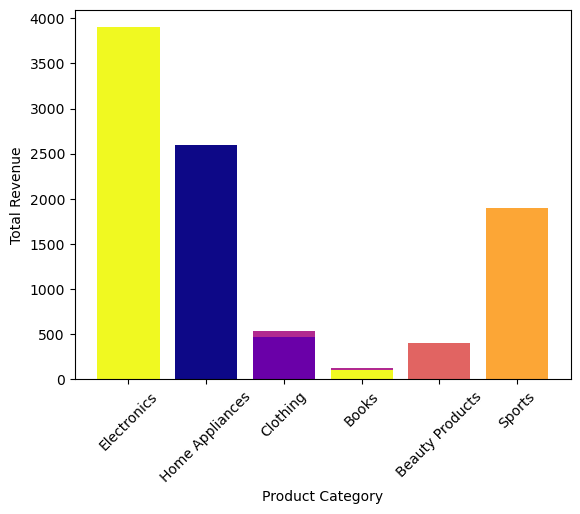

In [52]:
colors = mpl.colormaps['plasma'](np.linspace(0, 1, df['product_category'].nunique()))
plt.bar(df['product_category'], df['total_revenue'], color=colors)
plt.xticks(rotation=45)
# get colors from colorm

plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()